In [1]:
!pip install auto-sklearn

In [2]:
!pip install --upgrade scipy

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

#Classification Task

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [7]:
#creating X and y 
X=df.drop(['output'],axis=1)
y=df['output']

In [8]:
#split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
import autosklearn.classification

In [10]:
automl = autosklearn.classification.AutoSklearnClassifier( time_left_for_this_task=5*60,per_run_time_limit=30,tmp_folder='/temp/autosklearn_classification_example_tmp')

In [11]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=300,
                      tmp_folder='/temp/autosklearn_classification_example_tmp')

In [28]:
pprint(automl.sprint_statistics())

('auto-sklearn results:\n'
 '  Dataset name: 851c9852-8b24-11ec-80e6-0242ac1c0002\n'
 '  Metric: accuracy\n'
 '  Best validation score: 0.837500\n'
 '  Number of target algorithm runs: 56\n'
 '  Number of successful target algorithm runs: 56\n'
 '  Number of crashed target algorithm runs: 0\n'
 '  Number of target algorithms that exceeded the time limit: 0\n'
 '  Number of target algorithms that exceeded the memory limit: 0\n')


In [29]:
print(automl.leaderboard())

          rank  ensemble_weight                type    cost  duration
model_id                                                             
25           1             0.14            adaboost  0.1625  1.573843
35           2             0.08                 lda  0.1750  1.278471
55           3             0.02                 mlp  0.1875  1.534890
52           4             0.14       random_forest  0.1875  3.212619
45           5             0.02        bernoulli_nb  0.2125  1.589588
2            6             0.02       random_forest  0.2125  2.255765
47           7             0.02        bernoulli_nb  0.2250  1.732265
8            8             0.02       random_forest  0.2250  2.465161
30           9             0.02                 lda  0.2375  1.085160
11          10             0.02         extra_trees  0.2375  3.293584
57          11             0.04         extra_trees  0.2375  2.428468
31          12             0.12                 mlp  0.2750  3.583239
44          13      

In [30]:
pprint(automl.show_models())

{2: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff62ce04bd0>,
     'cost': 0.21250000000000002,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7ff62cdd7ed0>,
     'ensemble_weight': 0.02,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7ff62ce046d0>,
     'model_id': 2,
     'rank': 5,
     'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 8: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff62cb0bc10>,
     'cost': 0.22499999999999998,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7ff62cb9a890>,
     'ens

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= automl.predict(X_test)

In [33]:
# Score of the final ensemble
from sklearn.metrics import accuracy_score
m1_acc_score= accuracy_score(y_test, y_pred)
m1_acc_score

0.8852459016393442

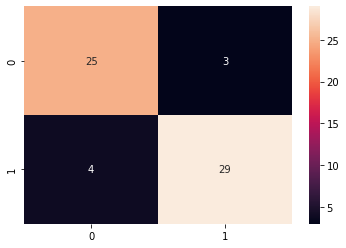

In [34]:
conf_matrix= confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [35]:
from sklearn.utils import resample
healthy= df[df["output"]==0]
unhealthy=df[df["output"]==1]

In [36]:
healthy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [37]:
unhealthy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
up_sampled=resample(healthy, replace=True, n_samples=len(unhealthy), random_state=42)
up_sampled=pd.concat([unhealthy, up_sampled])

In [39]:
#check updated class counts
up_sampled['output'].value_counts()

1    165
0    165
Name: output, dtype: int64

In [41]:
X1=up_sampled.drop(['output'],axis=1)
y1=up_sampled['output']

In [44]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape,y1_train.shape, y1_test.shape

((264, 13), (66, 13), (264,), (66,))

In [45]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task=5*60,per_run_time_limit=30,tmp_folder='/temp2/autosklearn_classification_example_tmp')
automl.fit(X1_train, y1_train)

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=300,
                      tmp_folder='/temp2/autosklearn_classification_example_tmp')

In [46]:
pprint(automl.sprint_statistics())

('auto-sklearn results:\n'
 '  Dataset name: 2d85af00-8b28-11ec-80e6-0242ac1c0002\n'
 '  Metric: accuracy\n'
 '  Best validation score: 0.875000\n'
 '  Number of target algorithm runs: 53\n'
 '  Number of successful target algorithm runs: 52\n'
 '  Number of crashed target algorithm runs: 0\n'
 '  Number of target algorithms that exceeded the time limit: 1\n'
 '  Number of target algorithms that exceeded the memory limit: 0\n')


In [47]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
31           1             0.04    gradient_boosting  0.125000  1.650446
12           2             0.04    gradient_boosting  0.125000  1.753110
2            3             0.02        random_forest  0.136364  2.333009
22           4             0.04          extra_trees  0.136364  2.499098
32           5             0.02    gradient_boosting  0.147727  1.208709
24           6             0.02             adaboost  0.147727  2.169341
50           7             0.02          extra_trees  0.147727  2.474407
53           8             0.14   passive_aggressive  0.147727  1.313685
17           9             0.06             adaboost  0.147727  1.601110
45          10             0.04         bernoulli_nb  0.159091  1.231367
44          11             0.08           libsvm_svc  0.159091  1.235612
26          12             0.08          extra_tree

In [48]:
pprint(automl.show_models())

{2: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff61f588910>,
     'cost': 0.13636363636363635,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7ff62bd66bd0>,
     'ensemble_weight': 0.02,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7ff61f588750>,
     'model_id': 2,
     'rank': 3,
     'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 7: {'balancing': Balancing(random_state=1, strategy='weighting'),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff61e016250>,
     'cost': 0.21590909090909094,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f

In [49]:
automl.score(X1_train, y1_train)

0.9621212121212122

In [50]:
automl.score(X1_test, y1_test)

0.8636363636363636

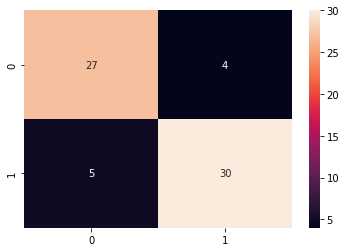

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred= automl.predict(X1_test)
conf_matrix= confusion_matrix(y1_pred, y1_test)
sns.heatmap(conf_matrix, annot=True)

In [52]:
from sklearn.metrics import accuracy_score
m2_acc_score= accuracy_score(y1_test, y1_pred)
m2_acc_score

0.8636363636363636

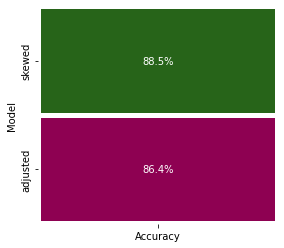

In [53]:
model_eval = pd.DataFrame({'Model': ['skewed','adjusted'], 'Accuracy': [m1_acc_score,m2_acc_score]})
model_eval = model_eval.set_index('Model').sort_values(by='Accuracy',ascending=False)
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.8, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(model_eval,cmap="PiYG",annot=True,fmt=".1%", linewidths=4,cbar=False,ax=ax0)
plt.show()

In [54]:
import pickle
# save the model 
filename = 'final_model.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [55]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8852459016393442


In [56]:
import joblib
# save the model 
filename = 'final_model.sav'
joblib.dump(automl, filename)

['final_model.sav']